# Tele-monitoring of Parkinson’s disease (PD)
    https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

# Description of the disease:
                 
         Parkinson’s disease is a chronic degenerative disorder of the central nervous system that affects mobility and                  movement in ageing population; it is classified as a movement disorder. Symptoms of PD starts gradually                          progressive damage of dopamine generating cells, tremors are common, but the PD disorder causes stiffness or slowness            of movement. Other than these impaired posture or balance, loss of automatic movements, speech changes, writing changes          are more common.  PD symptoms are worsening as condition progresses overtime. There is no proven evidence to get cured          PD, but medicine might improvise your symptoms and if needed doctor may suggest surgery on rare occasions to regulate            the brain and improvise your symptoms.
                 
         A PD case varies across the worldwide, but this distribution may not be relying on geographical or ethic factor. It is          known that PD more prevalent in Europe, North America than Africa and Asia. It is estimated that 6.3 million people              suffer across the globe and WHO estimated the crude prevalence rate of PD is 160 cases per 100000 population and                incidence rate 16 – 19 per 100000 population on each year. 
                              
         The unexpected growing disease in Parsi community that who lives in Mumbai has the world highest incidence of Parkinson          Disease about 328 per 100,000 people regardless of living in a India, with one of the world lowest incidence of                  Parkinson Disease (70 out of 100,000). 

# Source of the data:
               
         The original source of this dataset is who created and developed this tele-monitoring device from ‘University of                Oxford’ associated with Intel Corporation and 10 medical centres around in USA. 

# Details of Data extraction:

         This dataset is extracted during the six-month clinical trial study from 42 people with early stage of Parkinson                disease which captures remote monitoring voice speeches using tele-monitoring device. 

         There are 22 variables captured in this dataset which includes demographic characteristics of these patients and 16              biomedical voice measures. Each row corresponds one of these 5875 observations from these 42 people. 

# Description of features:

Input Variable: 

    Subject 		- Integer that uniquely identifies each subject
    Age 			- Subject age
    Sex 			- Subject gender '0' - male, '1' - female
    Test_time       - Time since recruitment into the trial. The integer part is the number of days since recruitment.
    motor_UPDRS 	- Clinician's motor UPDRS score, linearly interpolated
        HNR 		- Two measures of ratio of noise to tonal components in the voice
    RPDE 			- A nonlinear dynamical complexity measure
    DFA 			- Signal fractal scaling exponent
    PPE 			- A nonlinear measure of fundamental frequency variation
    Jitter (%), Jitter (Abs), Jitter: RAP, Jitter: PPQ5, Jitter: DDP - Several measures of variation in fundamental frequency.
    Shimmer, Shimmer (dB), Shimmer: APQ3, Shimmer: APQ5, Shimmer: APQ11, Shimmer: DDA - Several measures of variation in             amplitude.

Target Variable: 

    total_UPDRS 		- Clinician's total UPDRS score, linearly interpolated

# Related Paper: 

Little MA, McSharry PE, Hunter EJ, Ramig LO (2009),'Suitability of dysphonia measurements for tele-monitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering, 56(4):1015-1022.

Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Bio Medical Engineering Online 2007, 6:23 (26 June 2007).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
os.chdir("C:\\Users\Rathi-PC\Desktop\Python Class\ML Database Assignments")

In [5]:
PD_data = pd.read_csv('PD_ML.csv')

In [6]:
PD_data.head()

S.No  subject  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0     1        1   72    0     5.6431       28.199       34.398    0.00662   
1     2        1   72    0    12.6660       28.447       34.894    0.00300   
2     3        1   72    0    19.6810       28.695       35.389    0.00481   
3     4        1   72    0    25.6470       28.905       35.810    0.00528   
4     5        1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP   ...     Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.000034     0.00401   ...           0.230       0.01438       0.01309   
1     0.000017     0.00132   ...           0.179       0.00994       0.01072   
2     0.000025     0.00205   ...           0.181       0.00734       0.00844   
3     0.000027     0.00191   ...           0.327       0.01106       0.01265   
4     0.000020     0.00093   ...           0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  
0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006  
1        0.01689      0.02982  0.011112  27.183  0.43493  0.56477  0.10810  
2        0.01458      0.02202  0.020220  23.047  0.46222  0.54405  0.21014  
3        0.01963      0.03317  0.027837  24.445  0.48730  0.57794  0.33277  
4        0.01819      0.02036  0.011625  26.126  0.47188  0.56122  0.19361  

[5 rows x 23 columns]

In [7]:
PD_data.shape

(5875, 23)

In [8]:
PD_data.keys()

Index(['S.No', 'subject', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [9]:
PD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
S.No             5875 non-null int64
subject          5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtyp

In [22]:
PD_data.apply(lambda x: sum(x.isnull()), axis=0)

S.No             0
subject          0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

C:\Users\CoHRPICA_Project\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


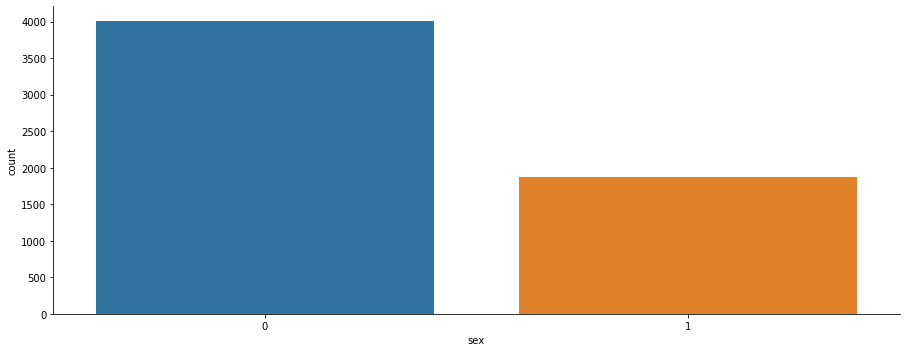

In [32]:
sns.factorplot(x = 'sex', data = PD_data , kind = 'count', aspect = 2.5)

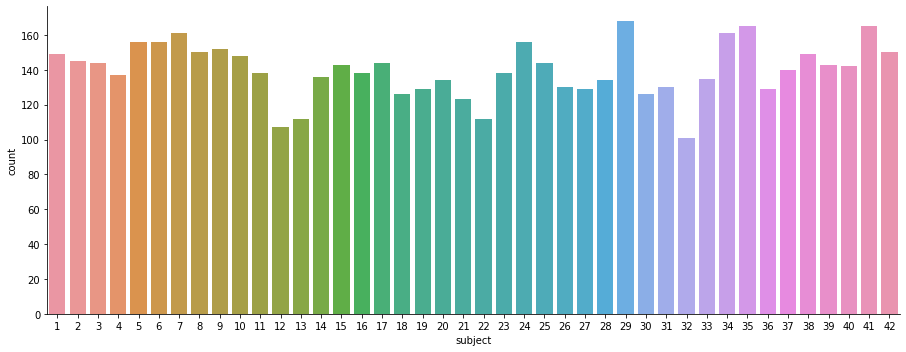

In [33]:
sns.factorplot(x = 'subject', data = PD_data , kind = 'count', aspect = 2.5)

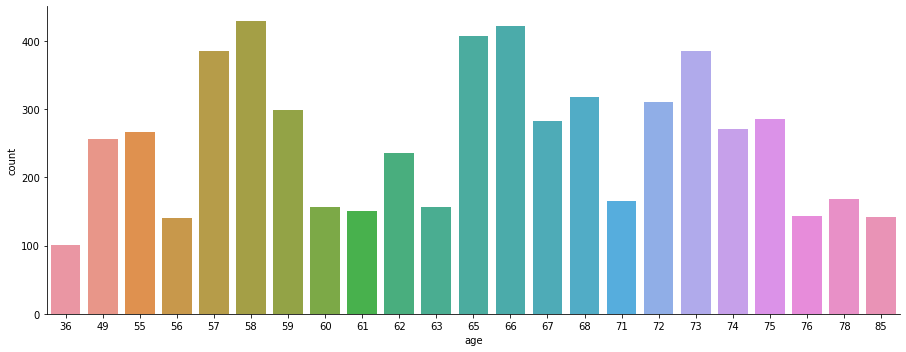

In [34]:
sns.factorplot(x = 'age', data = PD_data , kind = 'count', aspect = 2.5)

In [35]:
PD_data.describe().T

count         mean          std        min          25%  \
S.No           5875.0  2938.000000  1696.110747   1.000000  1469.500000   
subject        5875.0    21.494128    12.372279   1.000000    10.000000   
age            5875.0    64.804936     8.821524  36.000000    58.000000   
sex            5875.0     0.317787     0.465656   0.000000     0.000000   
test_time      5875.0    92.863722    53.445602  -4.262500    46.847500   
motor_UPDRS    5875.0    21.296229     8.129282   5.037700    15.000000   
total_UPDRS    5875.0    29.018942    10.700283   7.000000    21.371000   
Jitter(%)      5875.0     0.006154     0.005624   0.000830     0.003580   
Jitter(Abs)    5875.0     0.000044     0.000036   0.000002     0.000022   
Jitter:RAP     5875.0     0.002987     0.003124   0.000330     0.001580   
Jitter:PPQ5    5875.0     0.003277     0.003732   0.000430     0.001820   
Jitter:DDP     5875.0     0.008962     0.009371   0.000980     0.004730   
Shimmer        5875.0     0.034035     0.025835   0.003060     0.019120   
Shimmer(dB)    5875.0     0.310960     0.230254   0.026000     0.175000   
Shimmer:APQ3   5875.0     0.017156     0.013237   0.001610     0.009280   
Shimmer:APQ5   5875.0     0.020144     0.016664   0.001940     0.010790   
Shimmer:APQ11  5875.0     0.027481     0.019986   0.002490     0.015665   
Shimmer:DDA    5875.0     0.051467     0.039711   0.004840     0.027830   
NHR            5875.0     0.032120     0.059692   0.000286     0.010955   
HNR            5875.0    21.679495     4.291096   1.659000    19.406000   
RPDE           5875.0     0.541473     0.100986   0.151020     0.469785   
DFA            5875.0     0.653240     0.070902   0.514040     0.596180   
PPE            5875.0     0.219589     0.091498   0.021983     0.156340   

                       50%          75%          max  
S.No           2938.000000  4406.500000  5875.000000  
subject          22.000000    33.000000    42.000000  
age              65.000000    72.000000    85.000000  
sex               0.000000     1.000000     1.000000  
test_time        91.523000   138.445000   215.490000  
motor_UPDRS      20.871000    27.596500    39.511000  
total_UPDRS      27.576000    36.399000    54.992000  
Jitter(%)         0.004900     0.006800     0.099990  
Jitter(Abs)       0.000035     0.000053     0.000446  
Jitter:RAP        0.002250     0.003290     0.057540  
Jitter:PPQ5       0.002490     0.003460     0.069560  
Jitter:DDP        0.006750     0.009870     0.172630  
Shimmer           0.027510     0.039750     0.268630  
Shimmer(dB)       0.253000     0.365000     2.107000  
Shimmer:APQ3      0.013700     0.020575     0.162670  
Shimmer:APQ5      0.015940     0.023755     0.167020  
Shimmer:APQ11     0.022710     0.032715     0.275460  
Shimmer:DDA       0.041110     0.061735     0.488020  
NHR               0.018448     0.031463     0.748260  
HNR              21.920000    24.444000    37.875000  
RPDE              0.542250     0.614045     0.966080  
DFA               0.643600     0.711335     0.865600  
PPE               0.205500     0.264490     0.731730

In [25]:
PD_data.sex.value_counts()

0    4008
1    1867
Name: sex, dtype: int64

In [30]:
corr = PD_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

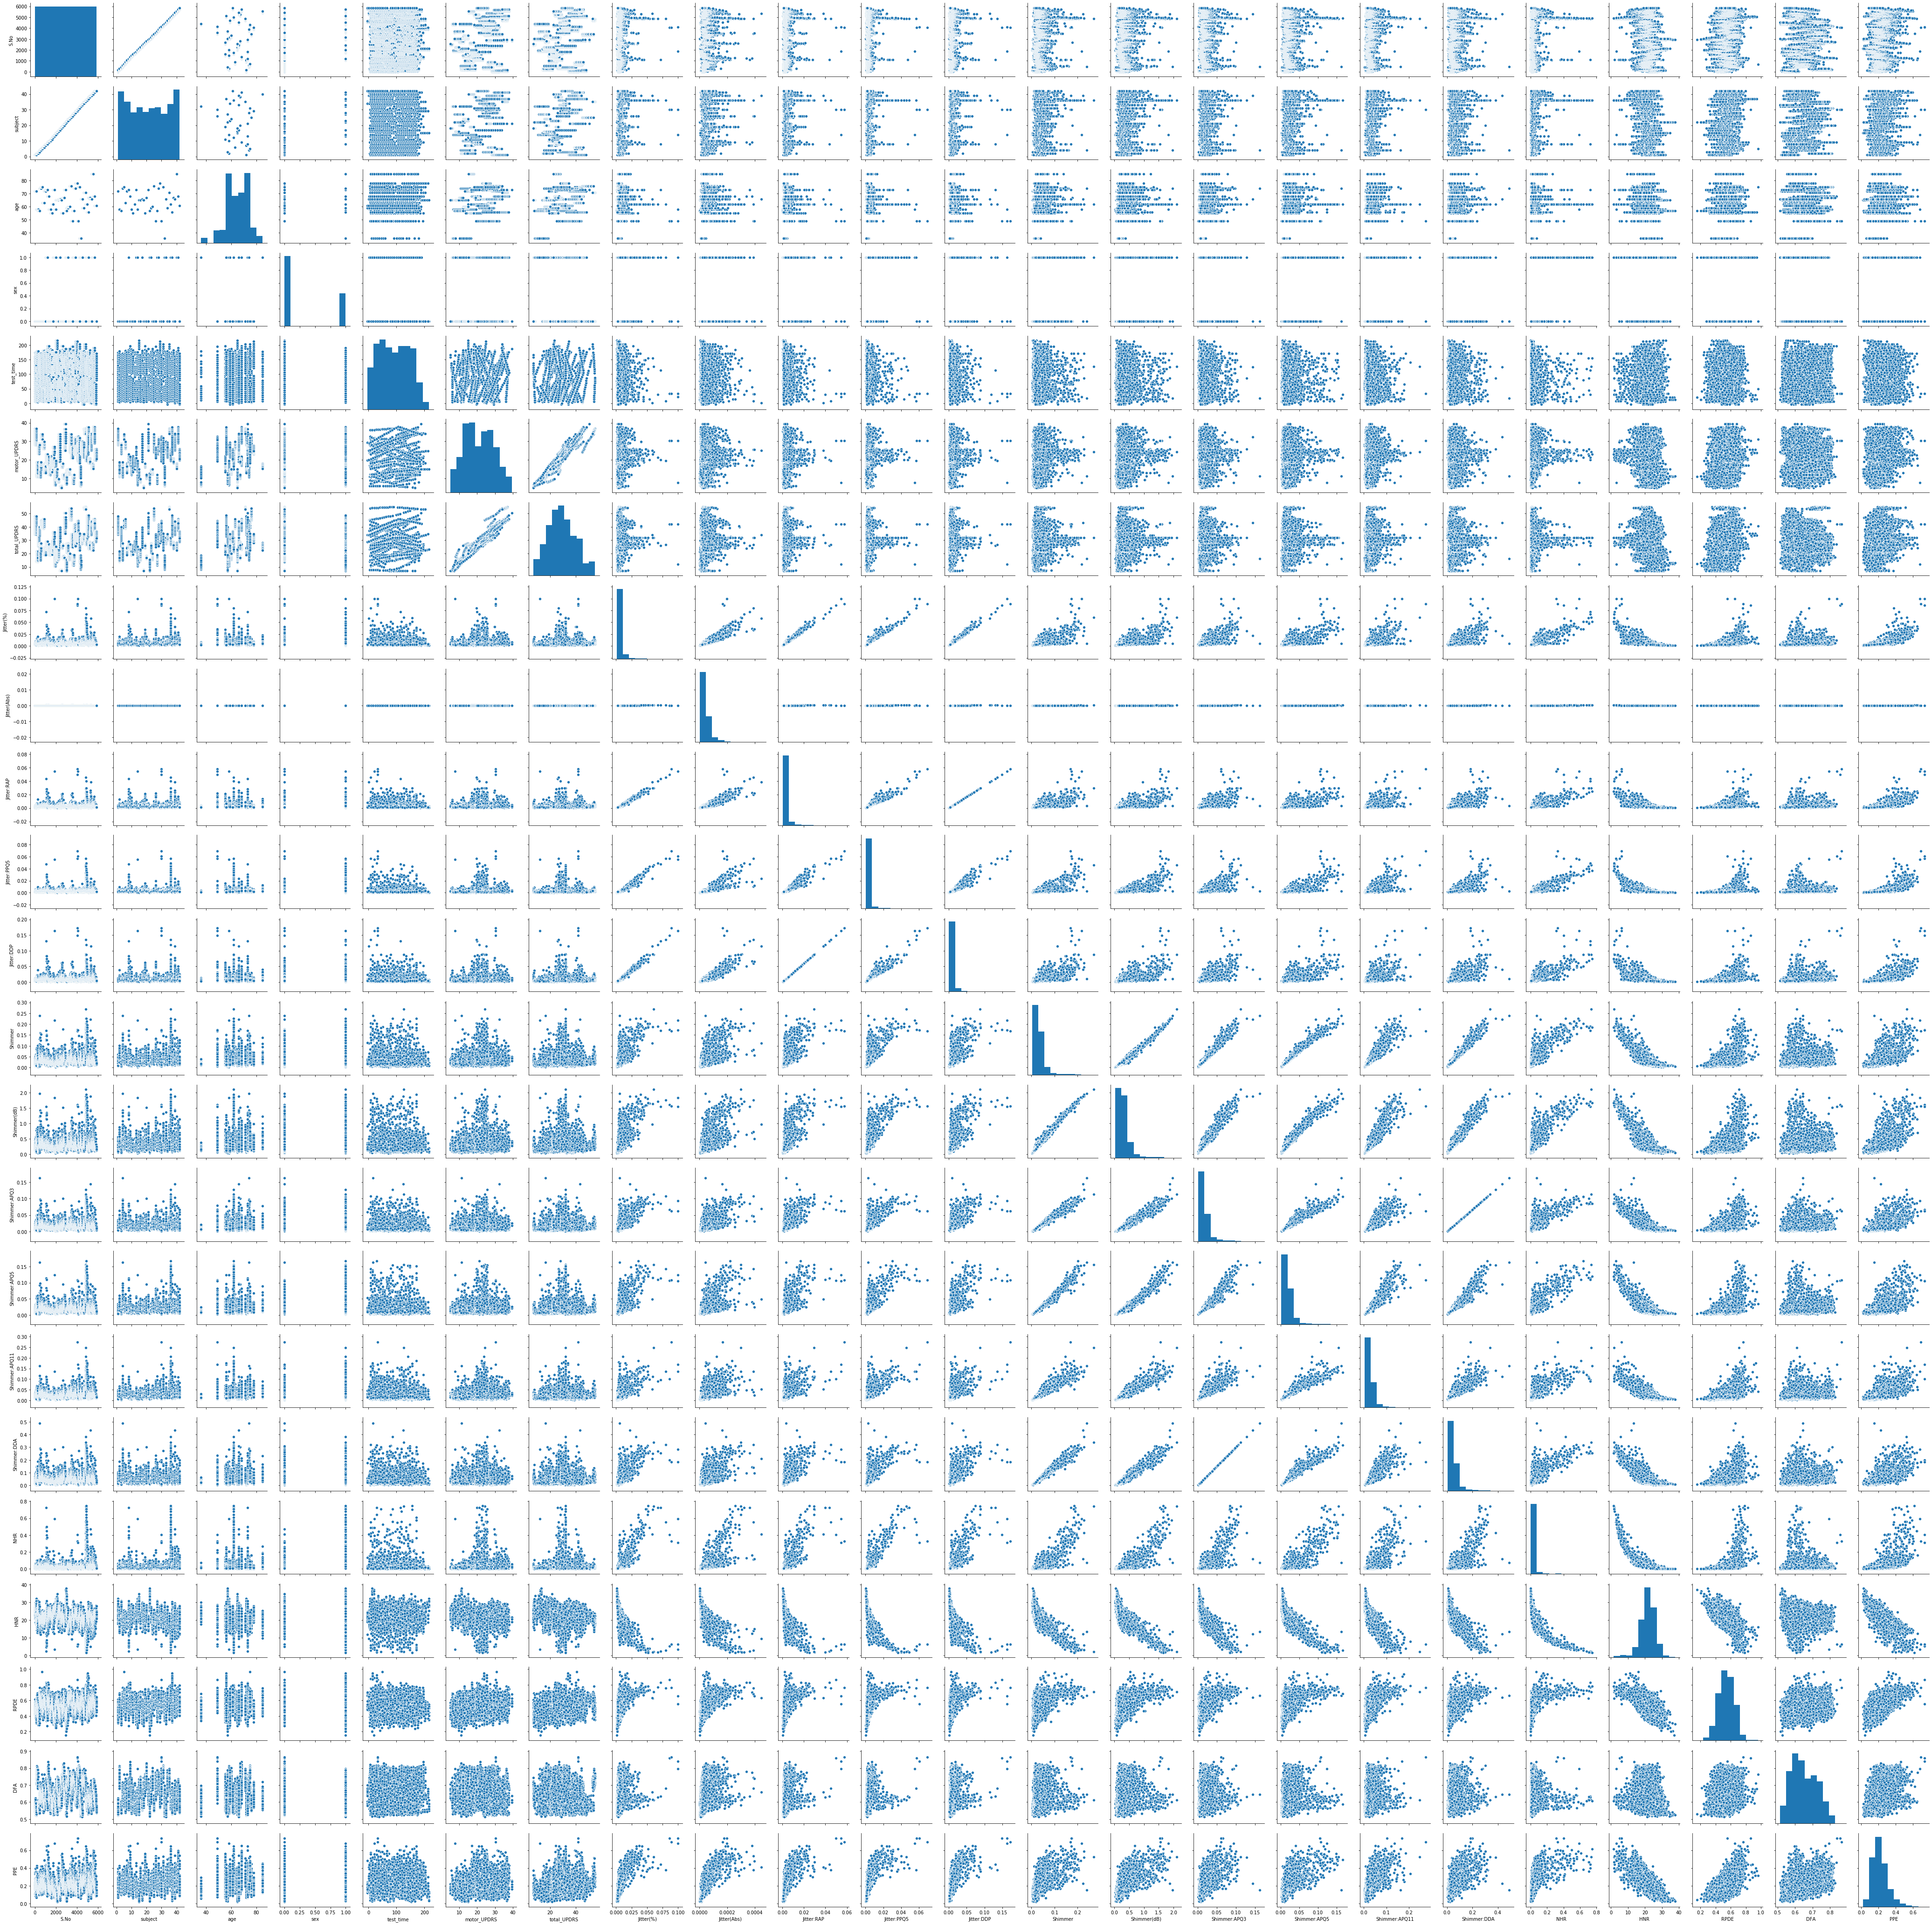

In [31]:
sns.pairplot(PD_data)
plt.show()

C:\Users\CoHRPICA_Project\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


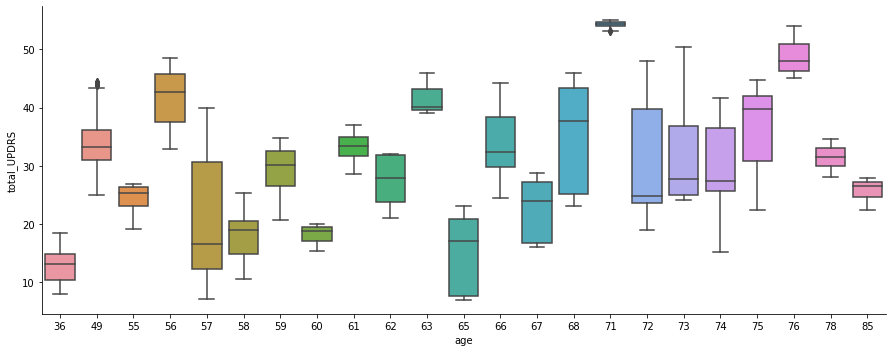

In [37]:
sns.factorplot(x='age', y='total_UPDRS', kind = 'box', data=PD_data, aspect = 2.5)

C:\Users\CoHRPICA_Project\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


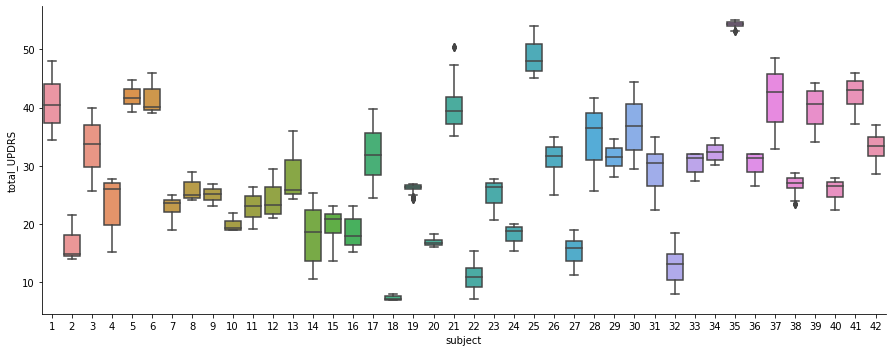

In [38]:
sns.factorplot(x='subject', y='total_UPDRS', kind = 'box', data=PD_data, aspect = 2.5)

C:\Users\CoHRPICA_Project\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


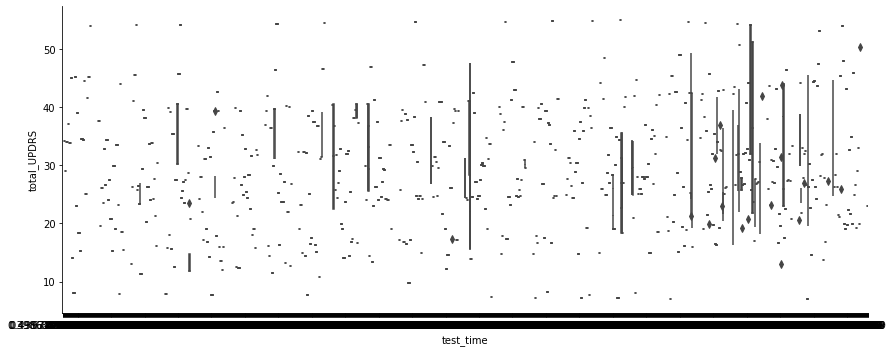

In [39]:
sns.factorplot(x='test_time', y='total_UPDRS', kind = 'box', data=PD_data, aspect = 2.5)

C:\Users\CoHRPICA_Project\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


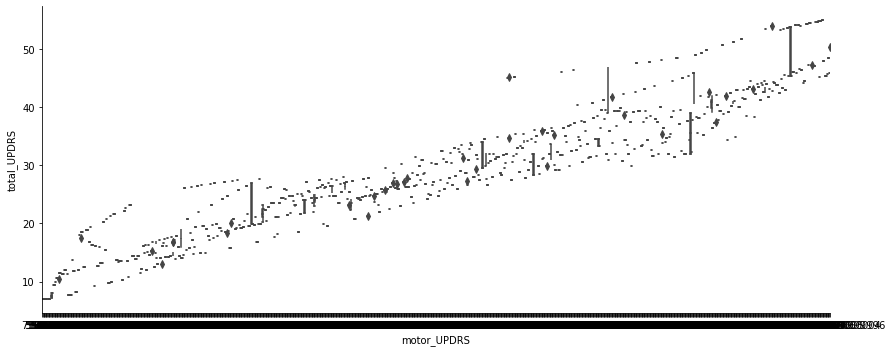

In [40]:
sns.factorplot(x='motor_UPDRS', y='total_UPDRS', kind = 'box', data=PD_data, aspect = 2.5)

C:\Users\CoHRPICA_Project\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


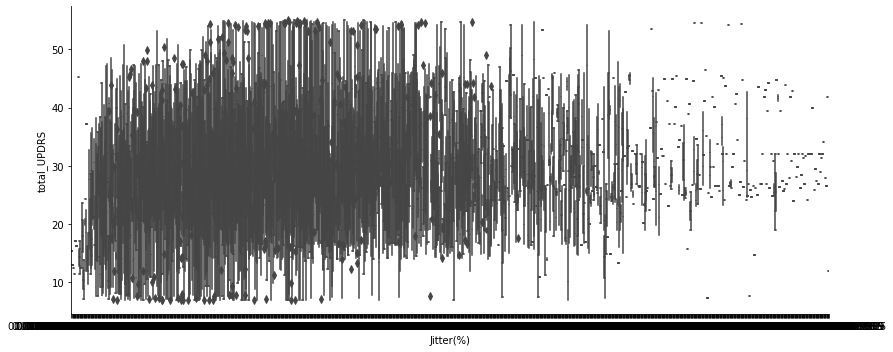

In [42]:
sns.factorplot(x='Jitter(%)', y='total_UPDRS', kind = 'box', data=PD_data, aspect = 2.5)

C:\Users\CoHRPICA_Project\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


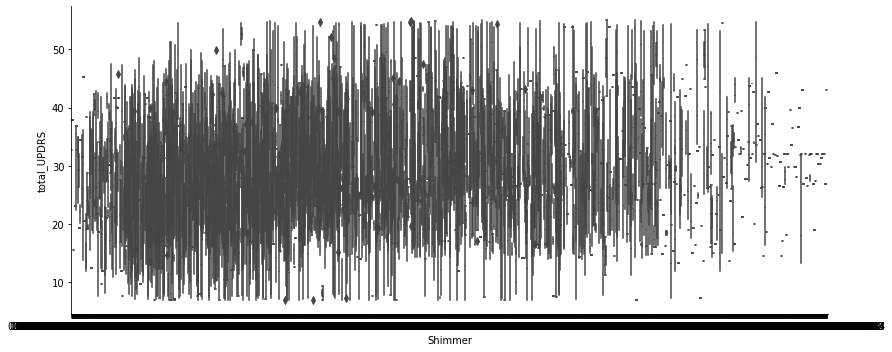

In [43]:
sns.factorplot(x='Shimmer', y='total_UPDRS', kind = 'box', data=PD_data, aspect = 2.5)

From scatterplot and Whisker plot data says that Jitter and shimmer associated variables highly correlates with total_UPDRS though having outliers observations. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
pd_df = pd.get_dummies(PD_data)

In [11]:
X = pd_df.drop(['total_UPDRS'], axis = 1)

In [12]:
Y = pd_df['total_UPDRS']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [14]:
PD_Model = LinearRegression()
PD_Model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4700, 22)
(4700,)
(1175, 22)
(1175,)


In [19]:
Y_Pred = PD_Model.predict(X_train)

In [20]:
rmse = np.sqrt(mean_squared_error(Y_Pred, Y_train))

In [21]:
R2 = PD_Model.score(X_train, Y_train)

In [22]:
print(rmse)
print(R2)

3.2077598185241425
0.9097018471823912


In [24]:
print('Coefficients: \n', PD_Model.coef_)

Coefficients: 
 [ 1.34903406e-03 -1.40987064e-01  7.03037339e-02 -1.70909833e+00
  3.08092265e-03  1.20873180e+00 -3.51583498e+02  1.53305813e+04
  5.32671055e+03  7.41701948e+01 -1.61142546e+03 -4.04461562e+01
  2.77400517e-01 -2.29024256e+04  1.11682892e+02 -4.15475131e+01
  7.62649885e+03 -6.05348264e+00 -8.58498783e-02  3.43200654e+00
 -3.62138167e+00 -4.04930656e+00]


In [25]:
print('Variance Score: {}'.format(PD_Model.score(X_test, Y_test)))

Variance Score: 0.9109525831505669
